RAG 系统入门指南 - Python 实现

In [2]:
import numpy as np

使用huggingface下载ai模型并使用trainflow进行模型安装和调用

huggingface下载页面
#https://huggingface.co/models

下载transformers依赖

In [1]:
pip install transformers

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.6 MB 1.9 MB/s eta 0:00:06
   --------- ------------------------------ 2.9/11.6 MB 6.2 MB/s eta 0:00:02
   --------------- ------------------------ 4.5/11.6 MB 6.7 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.6 MB 6.0 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.6 MB 4.8 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.6 MB 4.8 MB/s eta 0:00:02
   ------------------- -------------------- 5.8/11.6 MB 3.9 MB/s eta 0:00:02
   ---------------------- ----------------- 6.6/11.6 MB 4.2 MB/s eta 0:00:02
   ---------------------- ----------------- 6.6/11.6 MB 4.2 MB/s eta 0:00:02
   ----------------------- ---------------- 6.8/11.6 MB 3.2 MB/s eta 0:00:02
   -----------------

   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transformers]
   --------------------------------- ------ 5/6 [transf

In [5]:
pip install --upgrade transformers

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install huggingface_hub

Note: you may need to restart the kernel to use updated packages.


没办法了手动下载模型到本地

没有gpu推荐使用1.5b的蒸馏版
下载地址：https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B

##下载方式点击此处复制

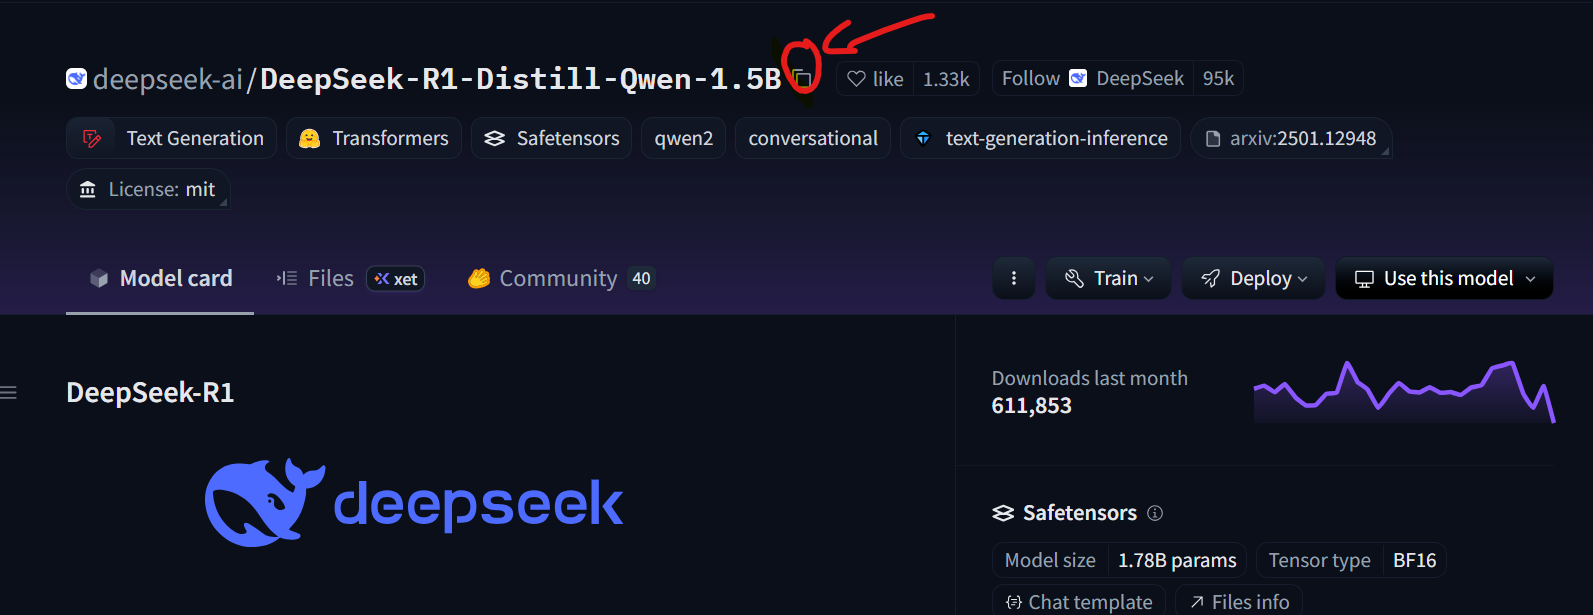

并使用一下代码进行下载

In [5]:
"""from transformers import AutoModel, AutoTokenizer

model_name = "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
save_model_path = r"C:\Users\325043\Desktop\model"  # 比如 "C:\Users\325043\Desktop\model"

# 下载并保存 tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.save_pretrained(save_model_path)

# 下载并保存 model
model = AutoModel.from_pretrained(model_name)
model.save_pretrained(save_model_path)"""


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 130-131: truncated \UXXXXXXXX escape (1847354369.py, line 12)

所需库和工具清单

In [7]:
!pip install langchain
!pip install langchain-community
!pip install langchain-huggingface
!pip install transformers
!pip install torch
!pip install faiss-cpu            # 如果使用 GPU，可改为 faiss-gpu
!pip install python-docx
!pip install PyPDF2

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 13.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 11.9 MB/s eta 0:00:00

   -- -------------------------------------  1/18 [tenacity]
   -- -------------------------------------  1/18 [tenacity]
   ---- -----------------------------------  2/18 [pydantic-core]
   ------ ---------------------------------  3/18 [orjson]
   -------- -------------------------------  4/18 [jsonpatch]
   ----------- ----------------------------  5/18 [h11]
   ------------- --------------------------  6/18 [greenlet]
   ------------- --------------------------  6/18 [greenlet]
   ------------- --------------------------  6/18 [greenlet]
   -----------

   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ------------------------------------- -- 2.4/2.5 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 9.7 MB/s eta 0:00:00

  Attempting uninstall: requests

    Found existing installation: requests 2.32.4

    Uninstalling requests-2.32.4:

      Successfully uninstalled requests-2.32.4

   ----------------------------------------  0/16 [requests]
   ----- ----------------------------------  2/16 [propcache]
   ---------- -----------------------------  4/16 [multidict]
   ------------ ---------------------------  5/16 [marshmallow]
   ------------ ---------------------------  5/16 [marshmallow]
   --------------- ------------------------  6/16 [httpx-sse]
   ----------------- ----------------------  7/16 [frozenlist]
   -------------------- -------------------  8/16 [aiohappyeyeballs]
   ---------------------- -----------------  9/16 [yarl]
   --------------------------- ------------ 11

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [14]:
pip install sentence-transformers


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.9 MB 10.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.1/8.9 MB 7.4 MB/s eta 0:00:01
   -------------------- ------------------- 4.5/8.9 MB 7.3 MB/s eta 0:00:01
   ----------------------- ---------------- 5.2/8.9 MB 6.2 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/8.9 MB 6.2 MB/s eta 0:00:01
   ---------------------------------- ----- 7.6/8.9 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 6.2 MB/s eta 0:00:00

   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   -------------------- ------------------- 2/4 [scikit-learn]
   -------------------- ------------------- 2/4 

系统架构解析
RAG系统主要包含三个组件：

检索器：从知识库中找到与用户查询最相关的文本片段
嵌入引擎：将文档内容转化为向量以便高效检索
生成器：基于检索到的内容创建最终回答
下面是完整的代码实现：

In [38]:
!pip install faiss-cpu

   ---------------------------------------- 0.0/18.2 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/18.2 MB 11.2 MB/s eta 0:00:02
   -------- ------------------------------- 3.9/18.2 MB 11.2 MB/s eta 0:00:02
   ------------ --------------------------- 5.8/18.2 MB 9.8 MB/s eta 0:00:02
   ----------------- ---------------------- 7.9/18.2 MB 9.9 MB/s eta 0:00:02
   -------------------- ------------------- 9.4/18.2 MB 9.5 MB/s eta 0:00:01
   ------------------------- -------------- 11.5/18.2 MB 9.6 MB/s eta 0:00:01
   ------------------------------ --------- 13.6/18.2 MB 9.7 MB/s eta 0:00:01
   ---------------------------------- ----- 15.7/18.2 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------  18.1/18.2 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 18.2/18.2 MB 9.6 MB/s eta 0:00:00


In [37]:
"""from huggingface_hub import snapshot_download

snapshot_download(
    repo_id="sentence-transformers/all-MiniLM-L6-v2",
    local_dir="./all-MiniLM-L6-v2",
    local_dir_use_symlinks=False
)"""


'from huggingface_hub import snapshot_download\n\nsnapshot_download(\n    repo_id="sentence-transformers/all-MiniLM-L6-v2",\n    local_dir="./all-MiniLM-L6-v2",\n    local_dir_use_symlinks=False\n)'

没办法了，分词器也手动下载吧https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/tree/main

In [ ]:
import os
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.chains import RetrievalQA
from langchain.chains.combine_documents.stuff import create_stuff_documents_chain
from langchain.prompts import PromptTemplate
from langchain_huggingface import HuggingFacePipeline
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import torch
from docx import Document  # 处理Word文档
from PyPDF2 import PdfReader  # 处理PDF文件
import Analysepdf as Apdf
import Analysedocs as Adoc

In [9]:
# ===============================
# 文件加载函数
# ===============================
def load_file(file_path, file_type):
    """根据文件类型加载不同文档"""
    if file_type == 'pdf':
        return Apdf.load_pdf(file_path)
    elif file_type == 'docx':
        return Adoc.load_docx(file_path)
    else:
        with open(file_path, 'r', encoding='utf-8') as f:
            return f.read()

In [16]:
def load_or_create_vector_db(documents_dir, index_path="analyseData/faiss", embedding_model_path="model/all-MiniLM-L6-v2"):
    """加载或创建 FAISS 向量数据库"""
    
    # 如果存在已保存的索引，直接加载
    if os.path.exists(index_path):
        print("✅ 加载已保存的向量数据库...")
        embeddings = HuggingFaceEmbeddings(model_name=embedding_model_path)
        return FAISS.load_local(index_path, embeddings)
    
    # 否则，创建新的向量库
    print("🔄 未找到向量数据库，开始重新构建...")
    all_texts = []
    for file_name in os.listdir(documents_dir):
        file_path = os.path.join(documents_dir, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.pdf', '.docx', '.txt')):
            ext = file_name.split('.')[-1].lower()
            text = load_file(file_path, ext)
            all_texts.append({'content': text, 'filename': file_name})

    if not all_texts:
        raise ValueError("❌ 没有找到任何文档，请检查目录路径")

    embeddings = HuggingFaceEmbeddings(model_name=embedding_model_path)
    metadatas = [{"source": doc['filename']} for doc in all_texts]

    db = FAISS.from_texts([doc['content'] for doc in all_texts], embeddings, metadatas=metadatas)
    db.save_local(index_path)
    print("✅ 向量数据库已创建并保存")

    return db

# ===============================
# 初始化本地 Hugging Face LLM
# ===============================
def init_llm(model_name_or_path="model/DeepSeek-R1-Distill-Qwen-1.5B"):
    """
    初始化本地 Hugging Face 模型
    model_name_or_path: Hugging Face Hub 名称或本地路径
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"

    #tokenizer = AutoTokenizer.from_pretrained("internlm/internlm2-chat-7b", trust_remote_code=True, cache_dir='/home/{username}/huggingface')
    tokenizer = AutoTokenizer.from_pretrained(model_name_or_path,local_files_only=True)
    model = AutoModelForCausalLM.from_pretrained(
    model_name_or_path,
    local_files_only=True,
    dtype=torch.float16 if device == "cuda" else torch.float32,
    device_map="auto" if device == "cuda" else None
)


    pipe = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
        device=0 if device == "cuda" else -1,
        max_new_tokens=512,
        do_sample=False
    )

    # 用 langchain 的 HuggingFacePipeline 封装
    return HuggingFacePipeline(pipeline=pipe)

def rag_pipeline(documents_dir, user_query, model_name="model/DeepSeek-R1-Distill-Qwen-1.5B"):
    """RAG 流程：加载或使用已保存的向量索引 → 问答"""
    
    # 1. 加载或创建向量数据库
    db = load_or_create_vector_db(documents_dir)

    # 2. 初始化本地 Hugging Face 模型
    llm = init_llm(model_name_or_path=model_name)

    # 3. 创建检索器
    retriever = db.as_retriever(
        search_type="mmr",
        search_kwargs={"k": 5}
    )

    # 4. 创建问答链
    prompt_template = "根据以下文档回答问题：\n{context}\n\n问题: {question}\n答案:"
    PROMPT = PromptTemplate(template=prompt_template, input_variables=["context", "question"])

    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        retriever=retriever,
        chain_type="stuff",
        chain_type_kwargs={"prompt": PROMPT},
        return_source_documents=True
    )

    print("✅ 问答链已准备好，正在回答问题...")

    try:
        response = qa_chain.invoke({"query": user_query})
        answer = response["result"]
        source_docs = response.get("source_documents", [])

        sources = []
        for doc in source_docs:
            metadata = doc.metadata
            page_content = doc.page_content
            if isinstance(metadata, dict) and "source" in metadata:
                snippet = page_content[:50] + "..." if len(page_content) > 50 else page_content
                sources.append({"filename": metadata["source"], "text": snippet})

        return {"answer": answer, "sources": sources}

    except Exception as e:
        print(f"❌ 处理查询时出错: {e}")
        return "抱歉，我无法回答这个问题，请提供更多上下文信息。"



In [17]:

# ===============================
# 主程序入口
# ===============================
if __name__ == "__main__":
    documents_dir = "lib"
    #documents_dir = r""
    query = input("请输入你的问题: ")

    # 使用 Hugging Face 本地模型
    result = rag_pipeline(documents_dir, query, model_name="model/DeepSeek-R1-Distill-Qwen-1.5B")

    if isinstance(result, dict):
        print("\n📌 答案:")
        print(result["answer"])

        print("\n📌 相关内容来源（片段）:")
        for src in result["sources"]:
            print(f"- 来源: {src['filename']}")
            print(f"  内容: {src['text']}\n")
    else:
        print(result)


请输入你的问题: 集合时间和地点
✅ 加载已保存的向量数据库...


ValueError: The de-serialization relies loading a pickle file. Pickle files can be modified to deliver a malicious payload that results in execution of arbitrary code on your machine.You will need to set `allow_dangerous_deserialization` to `True` to enable deserialization. If you do this, make sure that you trust the source of the data. For example, if you are loading a file that you created, and know that no one else has modified the file, then this is safe to do. Do not set this to `True` if you are loading a file from an untrusted source (e.g., some random site on the internet.).

准备文档目录：

创建一个名为my_documents的文件夹（或修改代码中的路径）

将你的PDF、Word和TXT文档放入该文件夹

运行程序：

技术解析

核心组件说明

文档加载器：使用PyPDF2和python-docx库处理不同格式的文档

嵌入模型：采用HuggingFace上的模型（轻量级、开源）

向量数据库：FAISS提供高效的相似度搜索功能

问答链：使用RetrievalQA结合检索和生成

关键步骤分析

文档加载与预处理：

读取PDF文件内容（每页提取文本）

解析Word文档内容（合并所有段落）

向量化过程：

将文档内容转换为数字向量表示

使用FAISS建立索引，便于快速相似度搜索

查询处理流程：

用户输入问题 → 检索相关文档片段 → 生成回答

回答包含原始上下文信息，提高准确性

扩展建议

本地模型部署：可以使用Sentence Transformers库加载本地预训练模型

查询优化：添加纠错和意图识别功能提升用户体验

多模态支持：集成OCR技术处理图片文档（需要额外安装pytesseract）

知识更新机制：实现自动检测新文档并更新知识库

注意事项

该代码使用了开源嵌入模型，如果对性能要求高可以考虑付费模型

检索结果质量高度依赖于文档内容质量和数量的质量比

对于大型文档，建议先进行分块处理（chunking）提高检索效率